In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time_series import TimeSeries

In [2]:
filename="Library_usage.csv"

column=(2)# we only want the monthly usage data
feature_name="monthly_usage"

# Information about the Dataset

For this part, I am using the 'Libraries - WiFi Usage' dataset that maps montly WiFi usage in public libraries in Chicago. I extracted this data from Chicago City Data Portal. 
It contains the following variables- 
- Year
- Month
- Monthly WiFi usage
- Cummulative monthly WiFi usage

This data is particularly interesting because while the general trend in monthly usage is upwards, there are some significant declines. It's plausible that the declines occur in holiday season. Also, it would be interesting to look at relationship between monthly usage of WiFi and WiFi cost or library fee. In India, over the last few years, WiFi/data coverage has increased exponentially because of reduce in price of data (I get unlimited data at 100Mb/s for 10$/month). So we might want to merge the dataset with library fee or WiFi price dataset to get more interesting insights. 

In [3]:
g=TimeSeries(filename, column, feature_name)

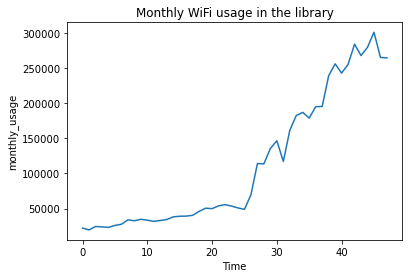

In [4]:
#plot the relationship
g.plot_monthly()

# General trend in Variable

When we plot monthly usage, we observe that the general trend is upwards, i.e. monthly usage of WiFi is increasing over time. This can be because more people are visiting libraries or WiFi consumption per capita has increased. We also observe that there are a few declines which can be a result of holiday season. Usually students go back home and therefore the traffic in libraries would decrease during the holiday season. 

# Plot Moving Average

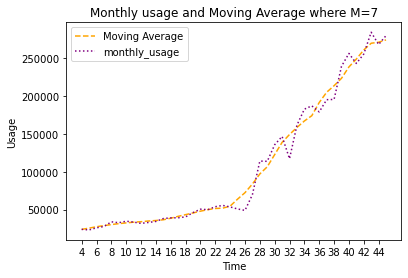

In [5]:
#plot the moving average with the original data
moving_average,time_step, main_trimmed, main_array=g.moving_average(7)

In the graph above, we have plotted moving average along with the original data for M=7.
- Both the graphs follow the expected upward trend
- While the actual monthly usage graphs has some ups and downs, moving average graph 'looks' monotonically increasing (thoug it might not be if we take a closer look). This is expected as moving average is supposed to smoothen out the occational fluctuation by transfering the fluctuation in one time period across time. 


Some information about the returned parameters:
- moving_average: array of moving_average
- time_step: array of all the valid time steps. So if M=7 and lenght of the main array is 48, time step contains all values from [4,45]
- main_trimmed: array of the original observations without the trimmed time steps. So we will have the original datapoints from time steps 4,45 in this array
- main_array: our original array

# Calculating Regression coefficients and Residuals

In [6]:
#model 1
# here we regress moving_average on time_step without the intercept
print("Lets look at Model 1")
BETA,R=g.without_intercept(moving_average, time_step)
slope=BETA[0][0]
r=R[0]
print("\nThe slope in the model without the intercept is {}".format(round(slope,3)))
print("\nThe residual of this model is {}".format(round(r,3)))
print("\nLets check if the residual function that I designed is working. Residual using the customized method:")
res=g.residual_only_slope(slope, moving_average, time_step)
print(res)

print("\nOhh yes it is!")

Lets look at Model 1

The slope in the model without the intercept is 4826.376

The residual of this model is 59993950619.736

Lets check if the residual function that I designed is working. Residual using the customized method:
59993950619.73559

Ohh yes it is!


In [7]:
#model 2: In this model, we also calculate the intercept
#we regress moving_average on time_step with the intercept
print("Now, let's look at Model 2")
BETA,R=g.with_intercept(moving_average, time_step)
intercept=round(BETA[0][0],3)
slope=round(BETA[1][0],3)
r=R[0]
print("\nThe intercept of this model is {}".format(intercept))
print("\nThe slope of this model is {}".format(slope))
print("\nThe residual of this model is {}".format(round(r,3)))

print("\nLets check if the residual function that I designed is working. Residual using the customized method:")
res=g.residual_with_intercept(BETA, moving_average, time_step)
print(res)

print("\nOhh yes it is!")


Now, let's look at Model 2

The intercept of this model is -52943.4

The slope of this model is 6562.419

The residual of this model is 36845254678.158

Lets check if the residual function that I designed is working. Residual using the customized method:
36845254678.15783

Ohh yes it is!


In Model 1, we are regressing moving average on time steps without the intercept. In Model 2, we are regressing moving average on time steps with the intercept

The residual in the second model is lower than the residual in the first model. Therefore, the second model works better. Some other inportant points to consider:
- We should always include the intercept in our regression equation unless we are absolutely sure that our linear approximation of the data generating process (linear regression model) either by some theoretical or any other reasons is forced to go through the origin. 
- Even if the intercept is statistically insignificant, excluding it can make our other coefficients biased. This means that the residual from the model without intercept will be higher than the residual from the model with the intercept. In our two models, this is exactly what happened.

# Changing M to see change in Moving Average

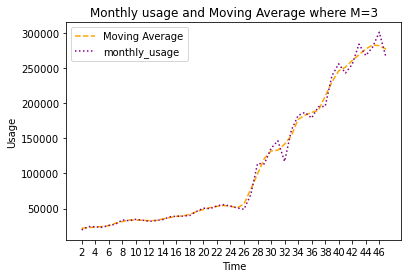

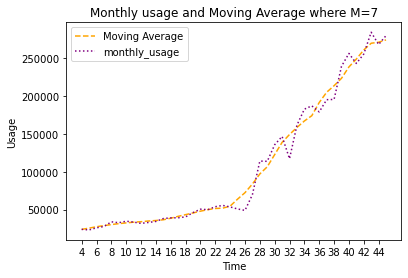

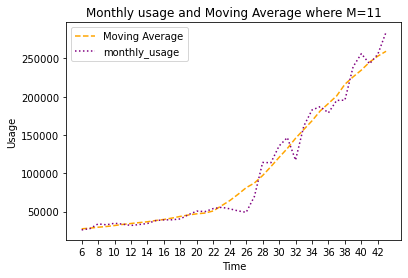

In [8]:
#changing m to see a change in the moving average
M=3
_,_,_,_=g.moving_average(M)

M=7
_,_,_,_=g.moving_average(M)

M=11
_,_,_,_=g.moving_average(M)



In the graphs above, the moving average graph smoothens as M increases. Intuitively this is happening because the occational fluctuations in the dataset gets distributed across time. If the the number of years across which the fluctuation gets distributed is large, then the curve is relatively smoother. 

# Predicting data points

[Text(0.5, 1.0, 'Actual and Predicted into the future'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Usage')]

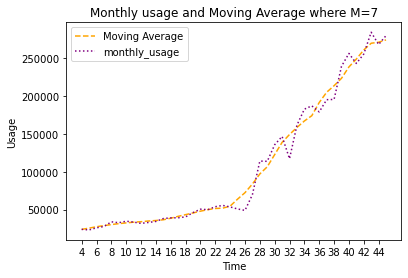

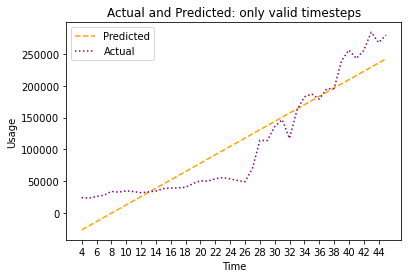

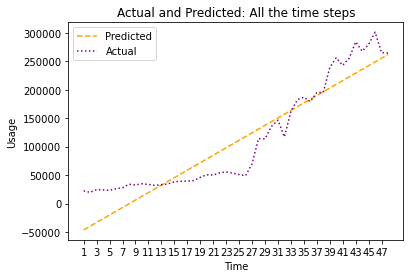

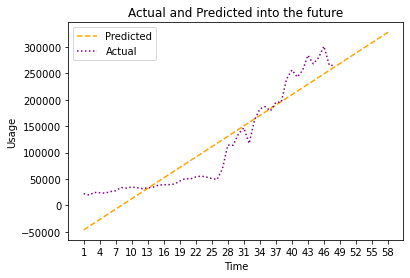

In [9]:
#predicting future values using the slope and the intercept. The regression coefficients we use are obtained from regressing 
#moving average on the time steps
M=7
moving_average,time_step, main_trimmed, main_array=g.moving_average(M)
BETA,R=g.with_intercept(moving_average, time_step)
intercept=round(BETA[0][0],3)
slope=round(BETA[1][0],3)
y_hat=intercept+slope*time_step

# in this graph, we will have only the valid time steps. So if M=7, we won't predict the first 3 and last 3 observations
fig, ax=plt.subplots()
ax.plot(time_step,y_hat,color='orange',linestyle='--', label="Predicted")
ax.plot(time_step,main_trimmed,color='purple',linestyle=':', label="Actual")
ax.set_xticks(np.arange(min(time_step), max(time_step)+1, 2))
ax.legend()
ax.set(title='Actual and Predicted: only valid timesteps',
        xlabel="Time",
        ylabel="Usage")

# in this graph, we will have all the time steps. So if M=7, we will also predict the first 3 and the last 3 observations
total_time=len(main_array)
total_time_array=np.arange(1,total_time+1)
y_total_time=intercept+slope*total_time_array
fig, ax=plt.subplots()
ax.plot(total_time_array,y_total_time,color='orange',linestyle='--', label="Predicted")
ax.plot(total_time_array,main_array,color='purple',linestyle=':', label="Actual")
ax.set_xticks(np.arange(min(total_time_array), max(total_time_array)+1, 2))
ax.legend()
ax.set(title='Actual and Predicted: All the time steps',
        xlabel="Time",
        ylabel="Usage")


#we will now predict 10 years into the future 
total_time=len(main_array)
total_time_array=np.arange(1,total_time+1)
total_time_array_future=np.arange(1,total_time+11)
y_total_time=intercept+slope*total_time_array_future
fig, ax=plt.subplots()
ax.plot(total_time_array_future,y_total_time,color='orange',linestyle='--', label="Predicted")
ax.plot(total_time_array,main_array,color='purple',linestyle=':', label="Actual")
ax.set_xticks(np.arange(min(total_time_array_future), max(total_time_array_future)+1, 3))
ax.legend()
ax.set(title='Actual and Predicted into the future',
        xlabel="Time",
        ylabel="Usage")

#not able to get rid of this redundant text

In the graphs above, we used the regression coefficients from regression of moving average on the time steps, to predict values. The four graphs above are:
- Graph 1: The graph of monthly usage of WiFi and moving average for all the valid time steps [4-45]
- Graph 2: In this graph, we predict the value for all the valid timesteps and plot it alongside monthly WiFi usage. So both the plots in this graph are only plotted for time steps [4,45]
- Graph 3: In this graph, we do the same thing as above but also predict for time-steps [1,3] and [46,48]
- Graph 4: In this graph, we predict for time steps [1-58]

While the prdicted values follow the same trend, the predictions for most of the time steps are far from their actual values. We can use the predicted value to get some sense of where the actual value might lie. However, we can't use the predicted value to accurately predict future values. 

One thing that might improve our model is taking powers (or square roots) of our main feature and also including that in our regression equation. This will ensure that the predicted values capture higher dimensions that our current model is not including. In Econometrics, we have some underlying information on how the data behaves (through previous literature, observations or domain knowledge) and we model our regression equation accordingly. Including function of our main feature should not be through hit or trial but backed up by some empirical or theoretical foundation.